In [1]:
## unsupervised learning - PCA and Clustering

# import numpy
import numpy as np

# import linear algebra module
from scipy import linalg as la

# create dataset
data = np.array(
    [[7., 4., 3.],
    [4., 1., 8.],
    [6., 3., 5.],
    [8., 6., 1.],
    [8., 5., 7.],
    [7., 2., 9.],
    [5., 3., 3.],
    [9., 5., 8.],
    [7., 4., 5.],
    [8., 2., 2.]]
)

# calculate the covariance matrix
# center your data
data -= data.mean(axis=0)
cov = np.cov(data, rowvar=False)

# calculate eigenvalues and eigenvector of the covariance matrix
evals, evecs = la.eig(cov)

# multiply the original data matrix with eigenvector matrix
num_components = 2
sorted_key = np.argsort(evals)[::-1][:num_components]
evals, evecs = evals[sorted_key], evecs[:, sorted_key]

print("Eigenvalues: ", evals)
print("Eigenvector: ", evecs)
print("Sorted and Selected Eigen Values: ", evals)
print("Sorted and Selected Eigen Vector: ", evecs)

# multiply orginal data and Eigen vector
principal_components = np.dot(data, evecs)
print("Principal Components: ", principal_components)

Eigenvalues:  [8.27394258+0.j 3.67612927+0.j]
Eigenvector:  [[-0.1375708   0.69903712]
 [-0.25045969  0.66088917]
 [ 0.95830278  0.27307986]]
Sorted and Selected Eigen Values:  [8.27394258+0.j 3.67612927+0.j]
Sorted and Selected Eigen Vector:  [[-0.1375708   0.69903712]
 [-0.25045969  0.66088917]
 [ 0.95830278  0.27307986]]
Principal Components:  [[-2.15142276 -0.17311941]
 [ 3.80418259 -2.88749898]
 [ 0.15321328 -0.98688598]
 [-4.7065185   1.30153634]
 [ 1.29375788  2.27912632]
 [ 4.0993133   0.1435814 ]
 [-1.62582148 -2.23208282]
 [ 2.11448986  3.2512433 ]
 [-0.2348172   0.37304031]
 [-2.74637697 -1.06894049]]


In [2]:
# import pandas and PCA
import pandas as pd

# import principal component analysis
from sklearn.decomposition import PCA

# create dataset
data = np.array([[7., 4., 3.],
                 [4., 1., 8.],
                 [6., 3., 5.],
                 [8., 6., 1.],
                 [8., 5., 7.],
                 [7., 2., 9.],
                 [5., 3., 3.],
                 [9., 5., 8.],
                 [7., 4., 5.],
                 [8., 2., 2.]])

# create and fit_transformed PCA Model
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data = components,
columns = ['principal_component_1', 'principal_component_2'])
print(components_df)

   principal_component_1  principal_component_2
0               2.151423              -0.173119
1              -3.804183              -2.887499
2              -0.153213              -0.986886
3               4.706518               1.301536
4              -1.293758               2.279126
5              -4.099313               0.143581
6               1.625821              -2.232083
7              -2.114490               3.251243
8               0.234817               0.373040
9               2.746377              -1.068940


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


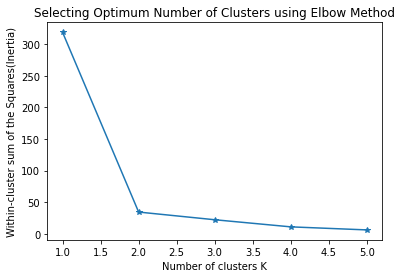

In [5]:
## clustering

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import K-means
from sklearn.cluster import KMeans

# create DataFrame
data = pd.DataFrame({"X":[12, 15, 18, 10, 8, 9, 12, 20],
                     "Y":[6, 16, 17, 8, 7, 6, 9, 18]})
wcss_list = []

# run a loop for different value of number of cluster
for i in range(1, 6):
    # create and fit the KMeans model
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data)
    # add the WCSS of inertia of the clusters to the score_list
    wcss_list.append(kmeans_model.inertia_)
    
# plot the interia(WCSS) and number of clusters
plt.plot(range(1, 6), wcss_list, marker='*')
    
# set title of the plot
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
    
# set X-axis label
plt.xlabel('Number of clusters K')
    
# set Y-axis label
plt.ylabel('Within-cluster sum of the Squares(Inertia)')
    
# display plot
plt.show()

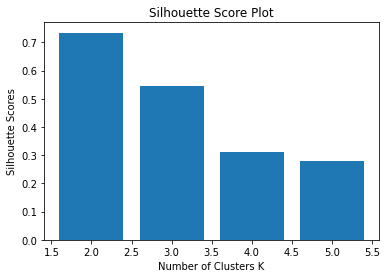

In [7]:
# import missing libs
from sklearn.metrics import silhouette_score

# create a DataFrame
data = pd.DataFrame({"X":[12, 15, 18, 10, 8, 9, 12, 20],
                    "Y":[6, 16, 17, 8, 7, 6, 9, 18]})
score_list = []

# run a loop for different value of number of cluster
for i in range(2, 6):
    # create and fit the KMeans model
    kmeans_model = KMeans(n_clusters = i, random_state=123)
    kmeans_model.fit(data)
    # make predictions
    pred = kmeans_model.predict(data)
    # calculate the Silhouette Score
    score = silhouette_score(data, pred, metric='euclidean')
    
    # add the Silhouette score of the clusters to the score_list
    score_list.append(score)
    
# plot the Silhouette score and number of cluster
plt.bar(range(2, 6), score_list)
    
# set title of the plot
plt.title('Silhouette Score Plot')
    
# set x-axis label
plt.xlabel('Number of Clusters K')

# set y-axis label
plt.ylabel('Silhouette Scores')
    
# display plot
plt.show()

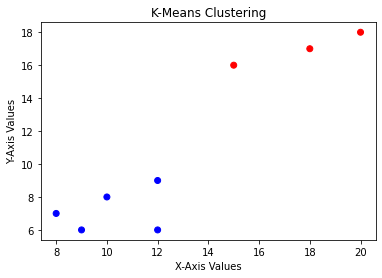

In [2]:
# import pandas
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# import K-means
from sklearn.cluster import KMeans

# create a DataFrame
data = pd.DataFrame({"X":[12, 15, 18, 10, 8, 9, 12, 20],
                    "Y":[6, 16, 17, 8, 7, 6, 9, 18]})

# define number of clusters
num_clusters = 2

# create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(data)

# predict the target variable
pred = km.predict(data)

# plot the clusters
plt.scatter(data.X, data.Y, c=pred, marker="o", cmap="bwr_r")

# set title of the plot
plt.title("K-Means Clustering")

# set x-axis label
plt.xlabel('X-Axis Values')

# set y-axis label
plt.ylabel('Y-Axis Values')

# display the plot
plt.show()

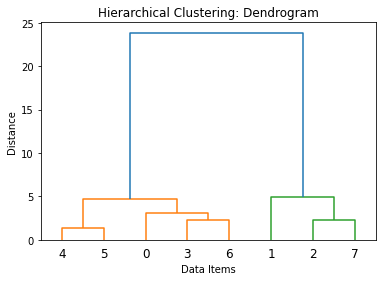

In [3]:
# hierarchical clustering

# import missing libs
# import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# create a DataFrame
data = pd.DataFrame({"X":[12, 15, 18, 10, 8, 9, 12, 20],
                    "Y":[6, 16, 17, 8, 7, 6, 9, 18]})

# create dendrogram using ward linkage
dendrogram_plot = dendrogram(linkage(data, method = 'ward'))

# set title of the plot
plt.title('Hierarchical Clustering: Dendrogram')

# set x-axis label
plt.xlabel('Data Items')

# set y-axis label
plt.ylabel('Distance')

# display the plot
plt.show()

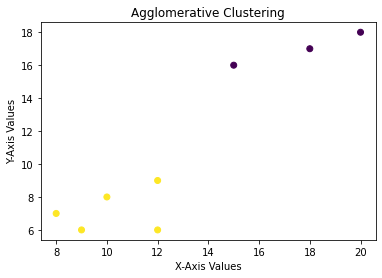

In [4]:
# import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# create a DataFrame
data = pd.DataFrame({"X":[12, 15, 18, 10, 8, 9, 12, 20],
                    "Y":[6, 16, 17, 8, 7, 6, 9, 18]})

# specify number of clusters
num_clusters = 2

# create agglomerative clustering model
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage = 'ward')

# fit the Agglomerative Clustering model
ac.fit(data)

# predict the target variable
pred = ac.labels_

# plot the Clusters
plt.scatter(data.X, data.Y, c=pred, marker='o')

# set title of the plot
plt.title('Agglomerative Clustering')

# set x-axis label
plt.xlabel('X-Axis Values')

# set y-axis label
plt.ylabel('Y-Axis Values')

# display the plot
plt.show()

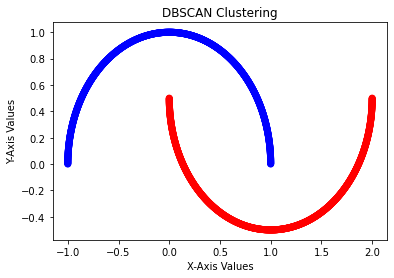

In [6]:
# DBSCAN clustering

# import missing libs
from sklearn.cluster import DBSCAN

# import make_moons dataset
from sklearn.datasets import make_moons

# generate some random moon data
features, label = make_moons(n_samples=2000)

# create DBSCAN clustering model
db = DBSCAN()

# fit the Spectral Clustering model
db.fit(features)

# predict the target variable
pred_label = db.labels_

# plot the Clusters
plt.scatter(features[:, 0], features[:, 1], c=pred_label,
           marker="o", cmap="bwr_r")

# set title of the plot
plt.title("DBSCAN Clustering")

# set x-axis label
plt.xlabel('X-Axis Values')

# set y-axis label
plt.ylabel('Y-Axis Values')

# display the plot
plt.show()

In [7]:
# spectral clustering - book
# evaluating clustering performance - book
# external performance evaluation - book